# Machine learning classifiers 


## Build a model using classification algorithms such as KNN, deesicion tree, SVM and logistic regression

> We have to load a historical dataset of loan applications, process the data, and build a model using classification algorithm.

> First we need to load libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import itertools 
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# DATASET: Loan applications

### then we have to download the loan application dataset. 
    To download the data, we will use !wget to download it from IBM Object Storage.


In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-09-19 09:49:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.1s    

2020-09-19 09:49:45 (228 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load the train and test data from .CSV formate file 

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head(400)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


### Visualization and preprocessing the loan applications dataset

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc875661e80>]],
      dtype=object)

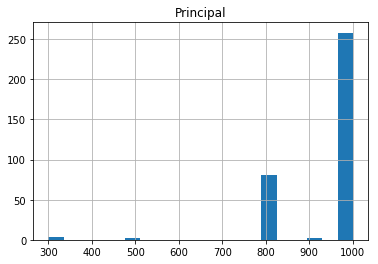

In [8]:
df.hist(column='Principal', bins=20)

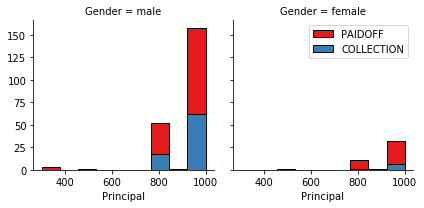

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

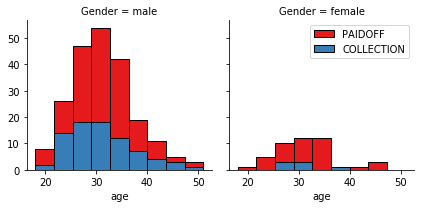

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Preprocessing the data

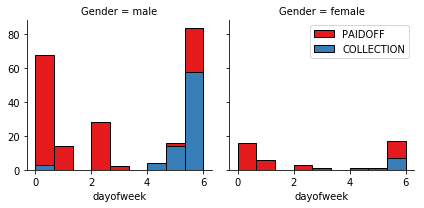

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,0,4,1
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,0,5,1
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,0,5,1
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,0,5,1


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
X = Feature
X[0:10]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
5,1000,30,36,0,1,0,0,1
6,1000,30,28,0,1,0,0,1
7,800,15,26,0,1,0,0,1
8,300,7,29,0,1,0,0,1
9,1000,15,39,0,1,0,1,0


In [19]:
y = df['loan_status'].values
y[0:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

## Implementaion of classifiers such as KNN, Decision Tree, SVM and Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (259, 8) (259,)
Test set: (87, 8) (87,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
yhat = neigh.predict(X_test)
yhat[0:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [25]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8455598455598455
Test set Accuracy:  0.7126436781609196


In [26]:
k = 4
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.8108108108108109
Test set Accuracy:  0.6436781609195402


In [27]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68965517, 0.6091954 , 0.71264368, 0.64367816, 0.73563218,
       0.66666667, 0.74712644, 0.67816092, 0.70114943, 0.68965517,
       0.79310345, 0.72413793, 0.77011494, 0.74712644])

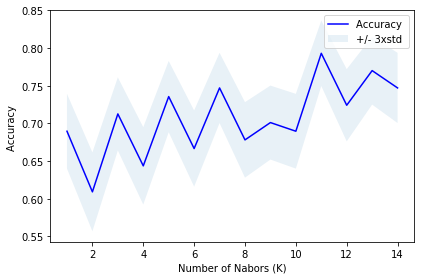

In [28]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7931034482758621 with k= 11


In [30]:
k_best = mean_acc.argmax()+1
knn_classifier = KNeighborsClassifier(n_neighbors = k_best).fit(X,y)

## Implementation of decision tree classifier 

In [31]:
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
loanTree # it shows the default parameters
loanTree.fit(X_train,y_train)
predTree = loanTree.predict(X_test)
print (predTree [0:10])
print (y_test [0:10])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [32]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test , predTree))

DecisionTrees's Accuracy:  0.8390804597701149


## Implementation of SVM classifier 

In [33]:
from sklearn import svm
loansvm = svm.SVC(kernel='rbf')
#loansvm = svm.SVC(kernel='linear')
loansvm.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
predsvm = loansvm.predict(X_test)
print (predsvm [0:10])
print (y_test [0:10])

['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [35]:
print("SVM's Accuracy: ", metrics.accuracy_score(y_test , predsvm))

SVM's Accuracy:  0.7241379310344828


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

  COLLECTION       0.14      0.14      0.14        14
     PAIDOFF       0.84      0.84      0.84        73

   micro avg       0.72      0.72      0.72        87
   macro avg       0.49      0.49      0.49        87
weighted avg       0.72      0.72      0.72        87

Confusion matrix, without normalization
[[ 2 12]
 [12 61]]


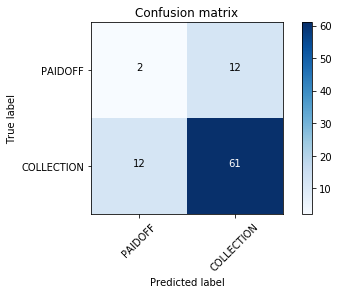

In [38]:
cnf_matrix = confusion_matrix(y_test, predsvm)
np.set_printoptions(precision=2)

print (classification_report(y_test, predsvm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=df["loan_status"].unique().tolist(),normalize= False,  title='Confusion matrix')

In [39]:
# F1_score calculation
from sklearn.metrics import f1_score
f1_score(y_test, predsvm, average='weighted') 

0.7241379310344828

In [40]:
# jaccard index for accuracy
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predsvm)

0.7241379310344828

## Implementation of Logistic Regression classifier 

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
predLR = LR.predict(X_test)
print (predLR [0:10])
print (y_test [0:10])

['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [44]:
# Probability of class
predLR_prob = LR.predict_proba(X_test)
predLR_prob

array([[0.51, 0.49],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.34, 0.66],
       [0.5 , 0.5 ],
       [0.31, 0.69],
       [0.32, 0.68],
       [0.47, 0.53],
       [0.33, 0.67],
       [0.44, 0.56],
       [0.46, 0.54],
       [0.31, 0.69],
       [0.47, 0.53],
       [0.45, 0.55],
       [0.34, 0.66],
       [0.34, 0.66],
       [0.46, 0.54],
       [0.46, 0.54],
       [0.28, 0.72],
       [0.5 , 0.5 ],
       [0.47, 0.53],
       [0.48, 0.52],
       [0.29, 0.71],
       [0.34, 0.66],
       [0.51, 0.49],
       [0.31, 0.69],
       [0.51, 0.49],
       [0.48, 0.52],
       [0.46, 0.54],
       [0.46, 0.54],
       [0.51, 0.49],
       [0.34, 0.66],
       [0.34, 0.66],
       [0.33, 0.67],
       [0.47, 0.53],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.3 , 0.7 ],
       [0.31, 0.69],
       [0.34, 0.66],
       [0.49, 0.51],
       [0.48, 0.52],
       [0.3 , 0.7 ],
       [0.45, 0.55],
       [0.5 , 0.5 ],
       [0.35, 0.65],
       [0.5 , 0.5 ],
       [0.46,

In [45]:
#jaccard index
jaccard_similarity_score(y_test, predLR)

0.8045977011494253

## Evaluation of classifier using Test set

In [46]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [47]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-09-19 09:52:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-09-19 09:52:02 (410 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test data set for evaluation

In [48]:
df_test = pd.read_csv('loan_test.csv')
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [49]:
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [50]:
df_test['dayofweek'] = df_test['effective_date'].dt.dayofweek

In [51]:
df_test['weekend'] = df_test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [52]:
df_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [53]:
Test_Feature = df_test[['Principal','terms','age','Gender','weekend']]
Test_Feature = pd.concat([Test_Feature,pd.get_dummies(df_test['education'])], axis=1)
Test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
Test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [54]:
test_input = Test_Feature

In [55]:
#this will be compared with the result of classifier
test_output = df_test['loan_status'].values
test_output[0:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [56]:
#the final input to be given to classifier
test_input= preprocessing.StandardScaler().fit(test_input).transform(test_input)
test_input[0:10]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86],
       [-1.24, -0.79,  0.2 , -0.51,  0.77, -0.42,  1.25, -0.86],
       [ 0.49, -0.79, -1.32, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [ 0.49,  0.93,  0.03, -0.51,  0.77,  2.4 , -0.8 , -0.86],
       [-0.67, -0.79, -0.81,  1.98,  0.77, -0.42, -0.8 ,  1.16],
       [ 0.49, -0.79,  0.87, -0.51,  0.77, -0.42, -0.8 ,  1.16]])

## Jaccard index and F1-score of KNN

In [57]:
#jaccard index
knn_pred = knn_classifier.predict(test_input)
knn_jaccard = jaccard_similarity_score(test_output, knn_pred)
knn_jaccard

0.6851851851851852

In [58]:
# F1_score
knn_f1 = f1_score(test_output, knn_pred, pos_label='PAIDOFF')
knn_f1

0.8045977011494252

## Jaccard index and F1-score of decision tree

In [59]:
#jaccard index
predTree = loanTree.predict(test_input)
predTree_jaccard = jaccard_similarity_score(test_output, predTree)
predTree_jaccard

0.7407407407407407

In [60]:
# F1_score
predTree_f1 = f1_score(test_output, predTree, pos_label='PAIDOFF')
predTree_f1

0.851063829787234

## Jaccard index and F1-score of SVM

In [61]:
#jaccard index
predsvm = loansvm.predict(test_input)
svm_jaccard = jaccard_similarity_score(test_output, predsvm)
svm_jaccard

0.7407407407407407

In [62]:
# F1_score
svm_f1 = f1_score(test_output, predsvm, pos_label='PAIDOFF')
svm_f1

0.8372093023255814

## Jaccard index and F1-score of LR

In [63]:
#jaccard index
predLR = LR.predict(test_input)
LR_jaccard = jaccard_similarity_score(test_output, predLR)
LR_jaccard

0.7962962962962963

In [64]:
# F1_score
LR_f1 = f1_score(test_output, predLR, pos_label='PAIDOFF')
LR_f1

0.8791208791208792

In [65]:
#logistic regression (LogLoss)
LR_prob = LR.predict_proba(test_input)
LR_logloss = log_loss(test_output, LR_prob)
LR_logloss

0.5795155298953841

In [66]:
# Reporting using pandas dataframe
data = {'Algorithm':['KNN','Decision Tree','SVM','Logistic Regression'], 'Jaccard':[knn_jaccard, predTree_jaccard, svm_jaccard, LR_jaccard],
        'F1-Score':[knn_f1, predTree_f1, svm_f1, LR_f1], 'Log-Loss':['NA', 'NA', 'NA', LR_logloss]}
# Create DataFrame
report_Classifier = pd.DataFrame(data)
report_Classifier

,Algorithm,Jaccard,F1-Score,Log-Loss
0,KNN,0.685185,0.804598,NA
1,Decision Tree,0.740741,0.851064,NA
2,SVM,0.740741,0.837209,NA
3,Logistic Regression,0.796296,0.879121,0.579516


# Assignment report of classifiers
## KNN:  jaccard index- 0.685185, F1_score-0.804597
## Desicion tree:  jaccard index- 0.740740, F1_score-0.851063
## SVM:  jaccard index- 0.740740, F1_score-0.837209
## Logistic regression:  jaccard index- 0.796296, F1_score-0.879120, LogLoss -0.579515

In [68]:
### Thank you Coursera (SAEED AGHABOZORGI and JOSEPH SANTARCANGELO)